# Lab 2 -- Assignment

## In this Lab you will:
 - Get county average corn yield data for Indiana (or another state of interest)
 - Wrangle the data using Excel to delete columns of little or no interest (you could do it in Python but we need to save time)
 - Follow the example of Lecture 2 to estimate the corn yield trend over time.

In [1]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

## 1. Data
To get some data for this exercise click on the link: <a href="https://quickstats.nass.usda.gov/" target="_blank">the USDA National Agricultural Statistics Service</a>. I'm using Indiana as an example below, but you are welcome to change it to Iowa, Illinois, Ohio, or name your state. There could, however, be some special cases that would have to be considered for different states.

On the quick stats page you should select: Survey; Crops; Field Crops; Corn; Yield; Corn Grain - Yield, Measured in Bu/Acre; County; Indiana (leave unchecked the rest of the choices).

Then click on the `get data` box at the bottom of the page. A spreadsheet should show up in the browser.

Then click on the `Spreadsheet` towards the top right. This should download a `.csv` file somewhere on your computer or in the docker if you are running this on `mybinder.org`. It will have a nasty long name. Rename it to something convenient.

If you are running on `mybinder.org` you will need to get this `.csv` onto your computer in order to use Excel.

Use Excel to remove un-needed columns.

Upload it to the directory `Lab2Data` in your fork of the 
<a href="https://github.com/jvkrogmeier/HEC-Lab-2" target="_blank">JVK github repo for HEC-Lab-2</a>.

If you are already running in `mybinder.org` you will need to close and restart to have your `.csv` file available ...

## 2. Name your file and put the name in here

In [2]:
# Replace Lab2Data/XXX.csv with Lab2Data/YourFileName.csv

my_file_name = 'Lab2Data/TF_IN_corn_yield_trim.csv'# FIX THIS!


my_file_name

'Lab2Data/TF_IN_corn_yield_trim.csv'

In [3]:
# Just run this block which will open the wrangled file for reading 
# only and print the first few lines. What would you change in the 
# block below to see more or fewer lines?

fin = open(my_file_name, "r")

for i in range(20):
    line = fin.readline()
    print(line, end='')

fin.close()

Year,County,Value
2020,BARTHOLOMEW,187.5
2020,BOONE,221.9
2020,CLINTON,207.1
2020,DECATUR,209.5
2020,GRANT,187.8
2020,HAMILTON,188.7
2020,HANCOCK,188.5
2020,HENDRICKS,205.2
2020,HOWARD,213.1
2020,JOHNSON,184.2
2020,MADISON,204.7
2020,MARION,191.9
2020,MORGAN,188
2020,RUSH,201.9
2020,SHELBY,191
2020,TIPTON,216.7
2020,BLACKFORD,187.9
2020,DELAWARE,192
2020,FAYETTE,191.5


## 3. Remove some unwanted non-counties

There are some names in the County field that correspond to combinations of counties or such. First we need to read the entire file to see what unique county names are present. There are probably some combined counties that we will want to elimate. Since we are concentrating only on one state we don't need to keep that information ...

Run the code below (and suitably modify where requested) to remove the undesired non-counties.

In the code block below you need to modify the integer indices corresponding to the `Year` column and the `County` column in your csv file. I've set the variables to something that won't work. You need to change it.

In [4]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# Initialize some empty sets.
years = set()
counties = set()

yearindex = 0 # FIX THIS!
countyindex = 1 # FIX THIS!




for line in fin:
    fields = line.split(',')
    yr = fields[yearindex].replace('"', '')
    years.add(yr)
    c = fields[countyindex].replace('"', '')
    counties.add(c)
                      
fin.close()

## Unique years, unique state_county_pairs
The set variable `years` will contain the unique years for which we have data. Similarly the set variable `counties` contains the unique locations for which we have data.

In [5]:
N_unique_years = len(years)
print(f'The number of unique years is {N_unique_years:2d}.')
print(f'The set of years is {years}.')

The number of unique years is 92.
The set of years is {'1958', '1940', '1961', '1942', '1943', '1931', '1956', '1990', '1930', '1983', '1963', '1934', '1976', '2010', '1938', '1974', '2020', '2017', '1946', '1933', '1994', '1998', '1972', '1957', '1969', '2016', '1993', '2007', '1944', '1989', '2009', '2005', '1951', '1979', '1988', '1978', '1959', '2018', '1939', '1968', '1981', '1965', '1929', '1949', '2001', '1935', '1941', '2013', '1970', '1985', '2004', '2006', '1980', '1954', '1971', '2014', '1997', '2012', '1932', '1995', '1947', '1999', '2000', '1967', '1987', '1952', '2003', '1982', '1977', '1953', '1975', '1992', '1973', '1960', '2019', '1991', '1964', '1962', '1984', '1986', '2011', '1948', '1937', '2002', '1955', '1936', '2015', '1996', '1966', '2008', '1945', '1950'}.


In [6]:
N_unique_counties = len(counties)
print(f'The number of unique counties is {N_unique_counties:2d}.')
print(f'The set of counties is {counties}.')

The number of unique counties is 94.
The set of counties is {'JENNINGS', 'BARTHOLOMEW', 'UNION', 'BROWN', 'MARTIN', 'WELLS', 'WHITLEY', 'LAKE', 'PULASKI', 'SCOTT', 'STEUBEN', 'HAMILTON', 'BOONE', 'DE KALB', 'SPENCER', 'WARRICK', 'HANCOCK', 'VIGO', 'SHELBY', 'SULLIVAN', 'WHITE', 'LA PORTE', 'TIPPECANOE', 'CLARK', 'GRANT', 'POSEY', 'MONTGOMERY', 'TIPTON', 'DUBOIS', 'RANDOLPH', 'LAWRENCE', 'MONROE', 'HARRISON', 'MIAMI', 'STARKE', 'ALLEN', 'JASPER', 'WARREN', 'DEARBORN', 'DECATUR', 'RIPLEY', 'OTHER (COMBINED) COUNTIES', 'OHIO', 'OTHER COUNTIES', 'WASHINGTON', 'HENDRICKS', 'BLACKFORD', 'FRANKLIN', 'HUNTINGTON', 'CRAWFORD', 'PARKE', 'JOHNSON', 'HOWARD', 'JAY', 'ST. JOSEPH', 'NOBLE', 'CLAY', 'CARROLL', 'OWEN', 'CLINTON', 'HENRY', 'MADISON', 'GIBSON', 'VANDERBURGH', 'JEFFERSON', 'ADAMS', 'WAYNE', 'PIKE', 'KNOX', 'SWITZERLAND', 'PERRY', 'FAYETTE', 'GREENE', 'ORANGE', 'MARSHALL', 'LAGRANGE', 'PORTER', 'DELAWARE', 'MARION', 'FOUNTAIN', 'WABASH', 'MORGAN', 'NEWTON', 'CASS', 'ELKHART', 'VERMILLION'

### Bad County Names
There are a certain number of county names in the `counties` list, which are not real county names. Define text strings that contain the bad county names so that we can ignore them later. By looking at the set of unique counties printed above, find the names we want to ignore and put them into the string variables below. For the Indiana data there are two bad names. Other states may have more or less ...

`BCN1` and `BCN2` are string variables. Don't forget the quotes.

In [7]:
# Bad county name 1, 2, 3 ... (BCN1, BCN2, etc)

BCN1 = 'OTHER (COMBINED) COUNTIES' # FIX THIS!
BCN2 = 'OTHER COUNTIES' # FIX THIS!




In [8]:
# Just to check 

print(f'The number of unique counties (before removal) is {N_unique_counties:2d}.')

# Remove the bad county names ...
counties.remove(BCN1)
counties.remove(BCN2)

N_unique_counties = len(counties)

print(f'The number of unique counties (after removal) is {N_unique_counties:2d}.')

The number of unique counties (before removal) is 94.
The number of unique counties (after removal) is 92.


## 4. Convert the Sets to Lists and Sort
We originally used sets to hold the `years` and `counties` data in order to impose uniqueness since sets never have duplicate elements. Therefore, when we were originally reading the data if the same year or same state-county pair was read multiple times (and they were), then we would automatically avoid adding duplicates.

Finally, we convert the sets to lists in order to sort them. We particularly want the `years` variable ordered numerically increasing.

In [9]:
# Convert them to lists. You need to replace XXX with the correct Python
# command to convert the sets to lists.

years = list(years) # FIX THIS!
counties = list(counties) # FIX THIS!



# Sort the years and counties lists. This is done so that we
# can refer to the data in the numpy array and have the order there
# correspond to the counties and year of interest.

# Two commands need to be run here in order to sort the years 
# and counties lists ...

years.sort() # FIX THIS!
counties.sort() # FIX THIS!




# Print just to see what the ordering looks like
print(years)
print()
print(counties)

['1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

['ADAMS', 'ALLEN', 'BARTHOLOMEW', 'BENTON', 'BLACKFORD', 'BOONE', 'BROWN', 'CARROLL', 'CASS', 'CLARK', 'CLAY', 'CLINTON', 'CRAWFORD', 'DAVIESS', 'DE KALB', 'DEARBORN', 'DECATUR', 'DELAWARE', 'DUBOIS', 'ELKHART', 'FAYETTE', 'FLOYD', 'FOUNTAIN', 'FRANKLIN', 'FULTO

## 5. Create the `isdata` and `ydata` arrays
Run the code blocks below (modify as needed) to create a numpy array that contains the information about whether a particular (county, year) has data in your file. The array will have rows indexed by county and columns indexed by year.

You will also define an array `ydata` to contain the yield data. 

In [10]:
# The variable "isdata" is initialized with zeros. When a one appears
# at a particular row and column it indicates that the corresponding
# county and year has yield data.

isdata = np.zeros((len(counties), len(years)))

# The variable "ydata" is also initialized with zeros.

ydata = np.zeros((len(counties), len(years)))

## Populating data into `isdata` and `ydata`
The next cell reads data from the `Lab2Data/XXX.csv` file and populates the numpy arrays `isdata` and `ydata`. Remember these two arrays were initialized as all zeros.

Below we will use the `index()` method, which returns the numeric index of the first occurrence of an item in a list. We made our `counties` and `years` lists to have unique items.

In [11]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# The year values are located in the column indexed by yearindex
# which you set in a previous cell. = County values in the fourth 
# are indexed by countyindex, also set previously. You now need to
# set the variable yieldindex to refer to the column of the csv
# file which contains County average yield values.

yieldindex = 2 # FIX THIS!




# Note how we use the python method .index in order to properly
# align the data values in the numpy arrays with the list values
# in years and state_county_pairs.

for line in fin:
    fields = line.split(',') #Separate line into individual items
    yr = fields[yearindex].replace('"', '') #Delete extra double quotes
    c = fields[countyindex].replace('"', '') #Delete extra double quotes
    if c in counties:
        rindex = counties.index(c)
        cindex = years.index(yr)
        isdata[rindex, cindex] = 1 #Insert "1" into isdata in proper place
        yd = fields[yieldindex]
        yd = yd.replace('\n', '') #Delete newline character at the end
        yd = yd.replace('"', '') #Delete extra double quotes
        ydata[rindex, cindex] = float(yd) #Insert a numeric yield value in the proper place
                      
fin.close()

## 6. The `if c in counties:` block was not used in the Lecture 3 code. Why is it needed here and not there?

If c in counties is used here because the bad counties need removed from that data set. That was not needed for the Lecture 3 code.

In [12]:
# Just to look at the array
print(ydata)

[[ 29.2  42.9  40.9 ... 194.5 170.1 179.9]
 [ 33.3  38.7  38.9 ... 181.7 181.4 165.2]
 [ 31.9  15.   43.9 ... 189.3   0.  187.5]
 ...
 [ 26.   43.   45.9 ... 204.1   0.  188.5]
 [ 28.6  34.3  39.  ... 196.9 177.6 178.5]
 [ 39.3  33.2  39.  ... 180.7 174.  159.6]]


In [13]:
# Just to look at the array
print(isdata)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [14]:
# Just run this code, which prepares a meshgrid for contour plots ...
iyrs = range(len(isdata[0,:]))
iscprs = range(len(isdata[:,0]))
IYRS, ISCPRS = np.meshgrid(iyrs,iscprs)

# Defining a function to evaluate values from isdata
def ID(x,y):
    return isdata[x,y]

# Evaluate on the mesh
Z = ID(ISCPRS,IYRS)

Text(0.5, 1.0, 'Data Available (green = have data, blue = no data)')

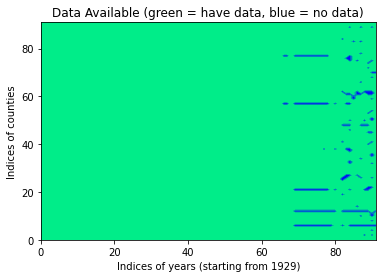

In [15]:
# Make filled contour plot and label axes, etc. ...
plt.contourf(IYRS,ISCPRS,Z, cmap='winter');
plt.ylabel('Indices of counties')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('Data Available (green = have data, blue = no data)')

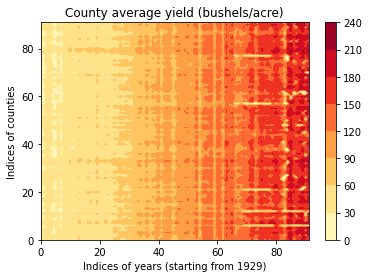

In [16]:
# Repeat only for the actual county average yield values
def Y(x,y):
    return ydata[x,y]
Z = Y(ISCPRS,IYRS)

plt.contourf(IYRS,ISCPRS,Z, cmap='YlOrRd');
plt.ylabel('Indices of counties')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('County average yield (bushels/acre)')
plt.colorbar()

### Compute the fraction of complete data in this data set ...

In [17]:
frac = (len(isdata[0,:])*len(isdata[:,0]) - sum(sum(isdata)))/(len(isdata[0,:])*len(isdata[:,0]))

print(f'Fraction of unavailable data is {frac:.2f}')

Fraction of unavailable data is 0.02


## 7. What is the first thing you notice when comparing the situation with Indiana corn yield data with wheat yield data as in the Lect 2 code?

There is a lot more data avaliable for Indiana corn tield data than there was for wheat yield data in Lect 2 code.

## 8. Some of the Indiana counties have complete yield data (i.e., for every one of the 92 years). Run the code blocks below to find out which counties they are.

In [18]:
# Initialize a vector to hold info about which counties contain
# data for every year. Then sequentially multiply all
# of the columns together.
all = np.ones(len(counties))

for i in range(len(years)):
    all = all*isdata[:,i]

In [19]:
# Look at the result
print(all)

[1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]


In [20]:
# Clearly some state-county pairs have data for all years. How many?
all.sum()

45.0

## Result of multiplying all rows of `isdata` ...
According to this test there are 45 Indiana counties which have data in all 92 years. Which counties are they?

In [21]:
c92 = []
i = 0
for c in counties:
    if all[i] > 0:
        c92.append(c)
    i = i + 1

In [22]:
print(c92)

['ADAMS', 'ALLEN', 'BENTON', 'BOONE', 'CARROLL', 'CLARK', 'DAVIESS', 'DEARBORN', 'DECATUR', 'DELAWARE', 'DUBOIS', 'FAYETTE', 'FRANKLIN', 'FULTON', 'HAMILTON', 'HANCOCK', 'HARRISON', 'HENDRICKS', 'JENNINGS', 'KOSCIUSKO', 'LA PORTE', 'LAGRANGE', 'MADISON', 'MARSHALL', 'MONROE', 'NEWTON', 'NOBLE', 'ORANGE', 'PORTER', 'POSEY', 'PULASKI', 'RANDOLPH', 'RUSH', 'SHELBY', 'ST. JOSEPH', 'TIPTON', 'UNION', 'VANDERBURGH', 'VERMILLION', 'WARREN', 'WARRICK', 'WASHINGTON', 'WAYNE', 'WHITE', 'WHITLEY']


### Let's use these `c92` counties

### Getting the data for the restricted state_county pairs set ...
In the code block below we want to create a list containing the indices from the entire collection of Indiana counties which correspond to the `c92`

In [23]:
rindex = []
for c in counties:
    if c in c92:
        rindex.append(counties.index(c))

# This creates the column index set corresponding to the years 
# for which data is available (which is actually every year)
cindex = []
for y in years:
    cindex.append(years.index(y))

## 9. Select a smaller array with continguous data ...
Out of the large array of size 92 x 92 containing county average yield data over various years we want to extract the smaller 45 x 92 array containing county average yield data for our selected state, county pairs of interest and our selected years of interest.

In [24]:
# Select the 45 rows corresponding to the counties of interest

select_ydata = ydata[rindex,:] # FIX THIS!




### Plot the individual county average yields on the same axis.

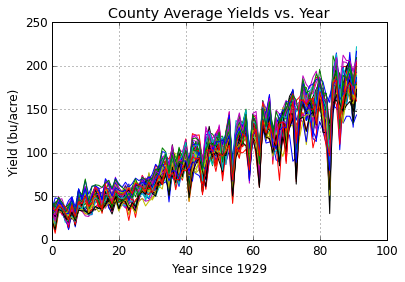

In [25]:
fig = plt.figure()
plt.style.use('classic')

for k in range(select_ydata.shape[0]):
    plt.plot(select_ydata[k,:])
    
plt.title("County Average Yields vs. Year")
plt.xlabel("Year since 1929")
plt.ylabel("Yield (bu/acre)")
plt.grid()

## 10. What happened in the year just past 80 in the plot above?

## 11. Compute the mean over all the counties in the array `select_ydata`. 

The resulting mean will still depend on the year, which will allow us to see trend in time.

10. That year was around 2009 and the U.S. was in the middle of a reccession.

In [26]:
select_ydata_mean = np.mean(select_ydata,axis=0) # FIX THIS!




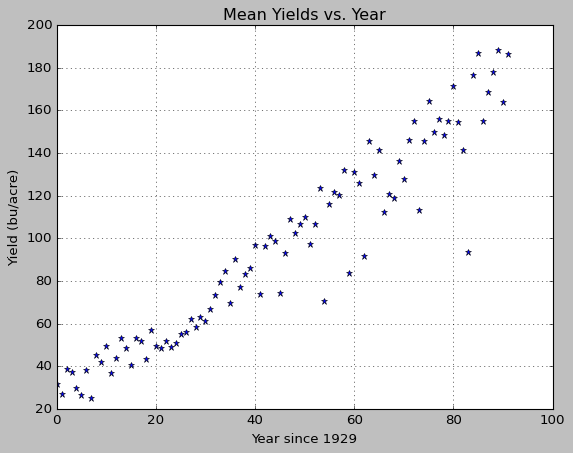

In [27]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(select_ydata_mean,'*')
plt.title("Mean Yields vs. Year")
plt.xlabel("Year since 1929")
plt.ylabel("Yield (bu/acre)")
plt.grid()

### Straight Line Fitting via Least Squares ...

<img align="left" src='Data2/LS-notes-p1.png' width="300"/>
<img align="left" src='Data2/LS-notes-p2.png' width="300"/>

[21.78365747  1.63562859]


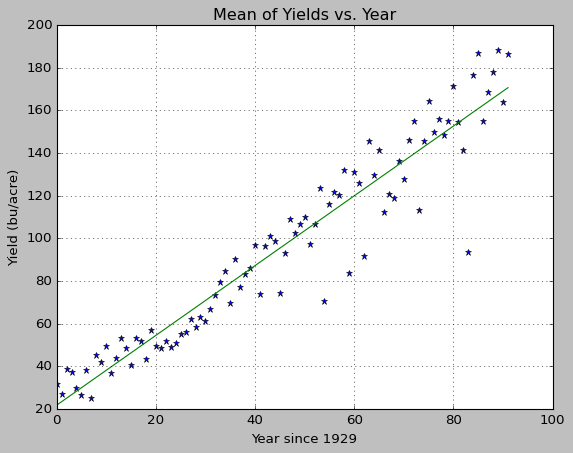

In [28]:
# First lets fit a line to the mean over the counties of 
# interest and see how that varies over time. The items below 
# correspond directly to the entries in the LS notes above.

y = select_ydata_mean
N = len(y)
x = range(N) # Remember we are using years starting from 0 in 1929
xy = np.multiply(x,y)
xx = np.multiply(x,x)
xsum = sum(x)
ysum = sum(y)
xxsum = sum(xx)
xysum = sum(xy)

A = np.zeros((2,2))
A[0,0] = N
A[0,1] = xsum
A[1,0] = xsum
A[1,1] = xxsum

b = np.zeros(2)
b[0] = ysum
b[1] = xysum

z = np.linalg.solve(A, b)
print(z)

# Now plot the best fit line on top of the data
fig = plt.figure()
plt.style.use('classic')
plt.plot(x,y,'*')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1929")
plt.ylabel("Yield (bu/acre)")
plt.grid()
yy = z[0] + z[1]*x
plt.plot(x,yy)

## 12. What is the Yield Improvement Trend in bu/acre per year?

There is quite a difference between corn and wheat breeding!

## 13. Google to see what you can find on the corn yield improvement trend. Does this data agree with what you find?

12. The yield improvement trend is 1.6 bu/acre per year.
13. An April 2020 report by Purdue Agronomy found that corn improvement trend is around 1.9 bu/acre per year so the data agrees with what I found.

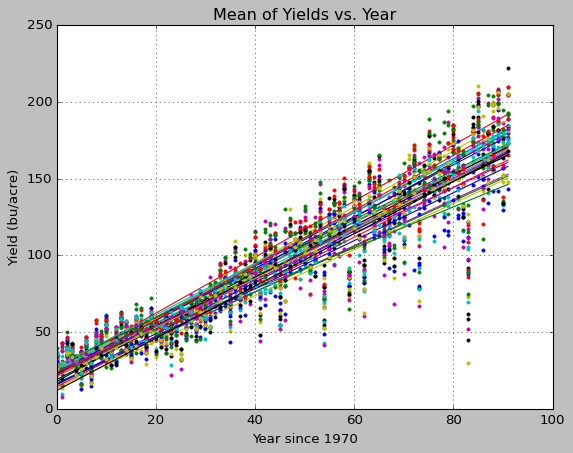

In [29]:
# With a for loop ...
fig = plt.figure()
plt.style.use('classic')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1970")
plt.ylabel("Yield (bu/acre)")
plt.grid()

for k in range(28):
    y = select_ydata[k,:]
    N = len(y)
    x = range(N) # Remember we are years starting from 0
    xy = np.multiply(x,y)
    xx = np.multiply(x,x)
    xsum = sum(x)
    ysum = sum(y)
    xxsum = sum(xx)
    xysum = sum(xy)

    A = np.zeros((2,2))
    A[0,0] = N
    A[0,1] = xsum
    A[1,0] = xsum
    A[1,1] = xxsum

    b = np.zeros(2)
    b[0] = ysum
    b[1] = xysum

    z = np.linalg.solve(A, b)

    # Now plot the best fit line on top of the data
    plt.plot(x,y,'.')
    yy = z[0] + z[1]*x
    plt.plot(x,yy)

### Fin